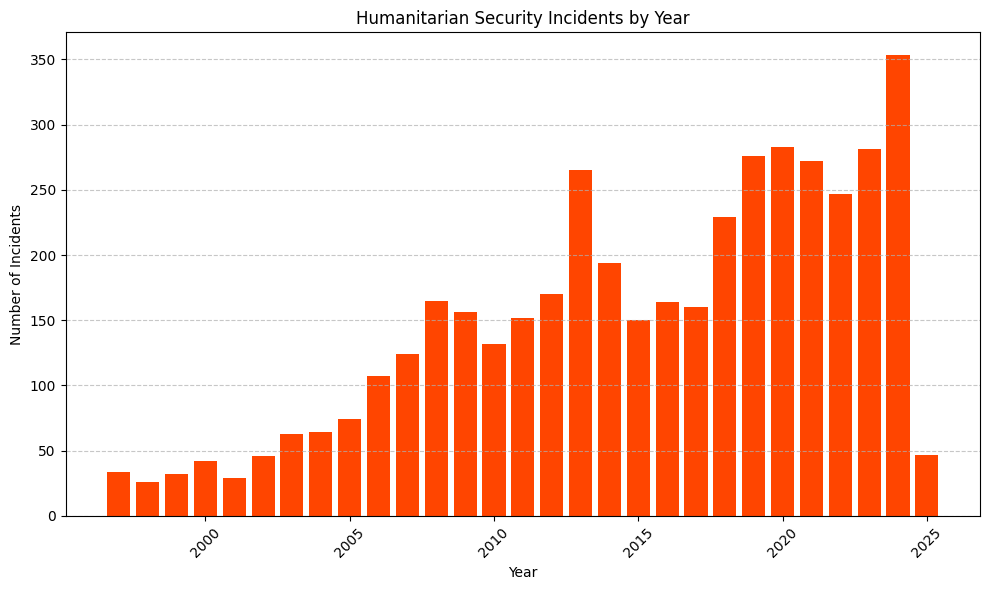

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/security_incidents.csv')

# Ensure the Year column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Count the number of incidents per year
incident_counts = df['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(incident_counts.index, incident_counts.values, color='#ff4500')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Humanitarian Security Incidents by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart to src/assets/
plt.tight_layout()
plt.savefig('../src/assets/incidents_by_year.png')
plt.show()


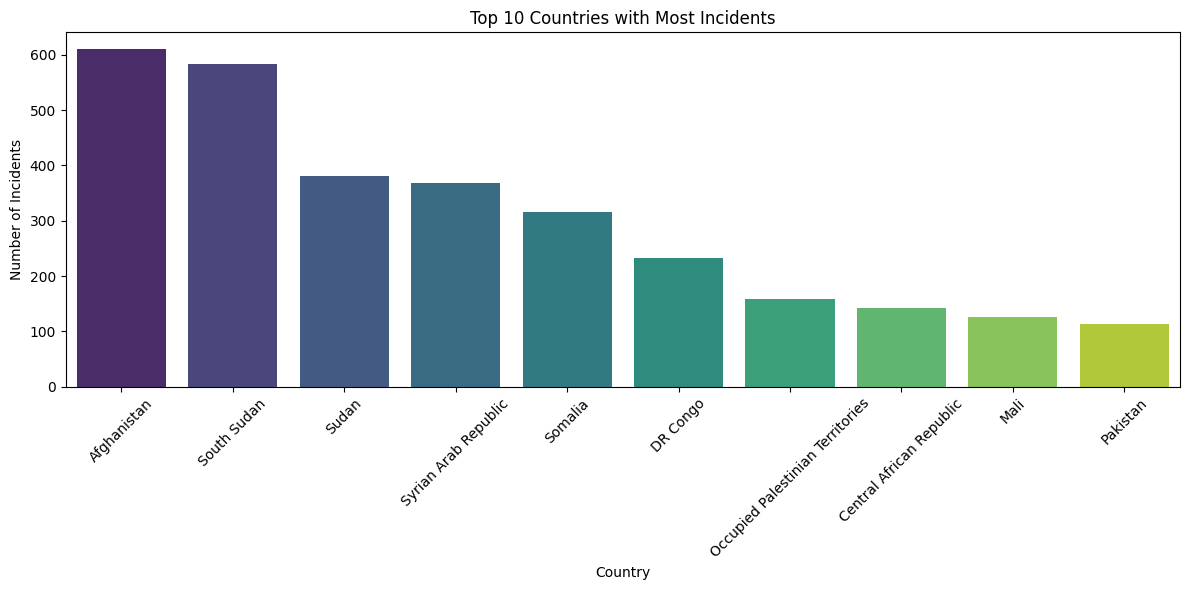

In [2]:
import seaborn as sns

# Count incidents by country
country_counts = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    hue=country_counts.index,  
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Countries with Most Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../src/assets/top_countries.png')
plt.show()


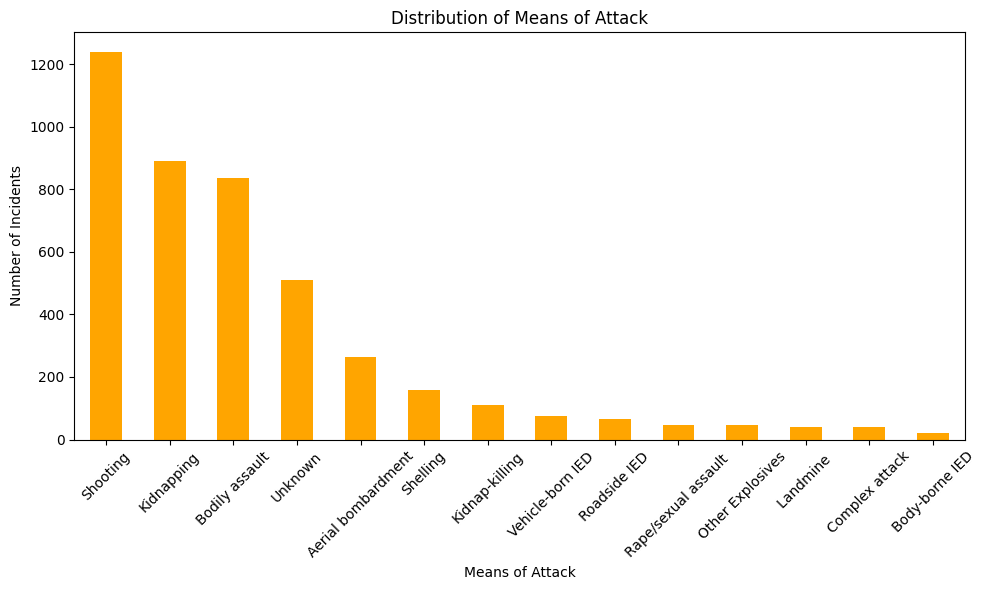

In [3]:
# Count means of attack
attack_counts = df['Means of attack'].value_counts()

# Plot
plt.figure(figsize=(10,6))
attack_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Means of Attack')
plt.xlabel('Means of Attack')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../src/assets/attack_means.png')
plt.show()


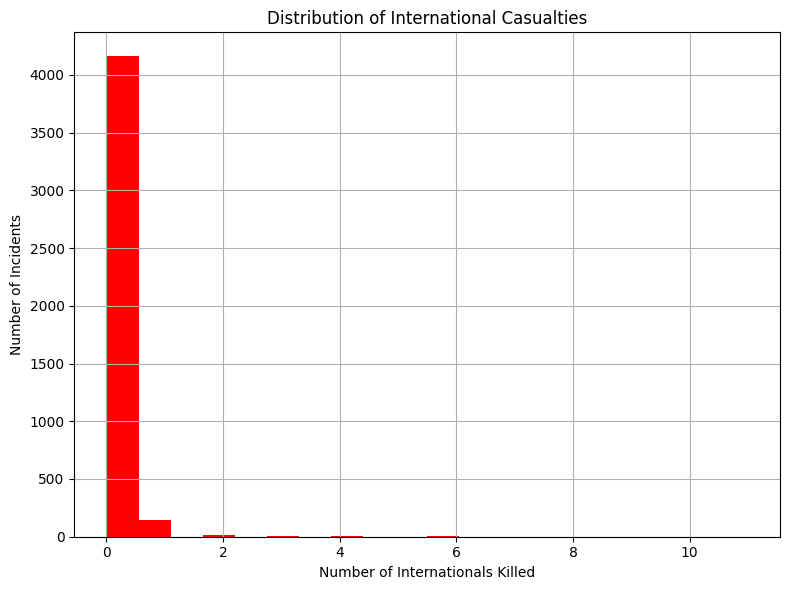

In [4]:
# Plot histogram of international casualties
plt.figure(figsize=(8,6))
df['Internationals killed'].hist(bins=20, color='red')
plt.title('Distribution of International Casualties')
plt.xlabel('Number of Internationals Killed')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.savefig('../src/assets/internationals_killed.png')
plt.show()


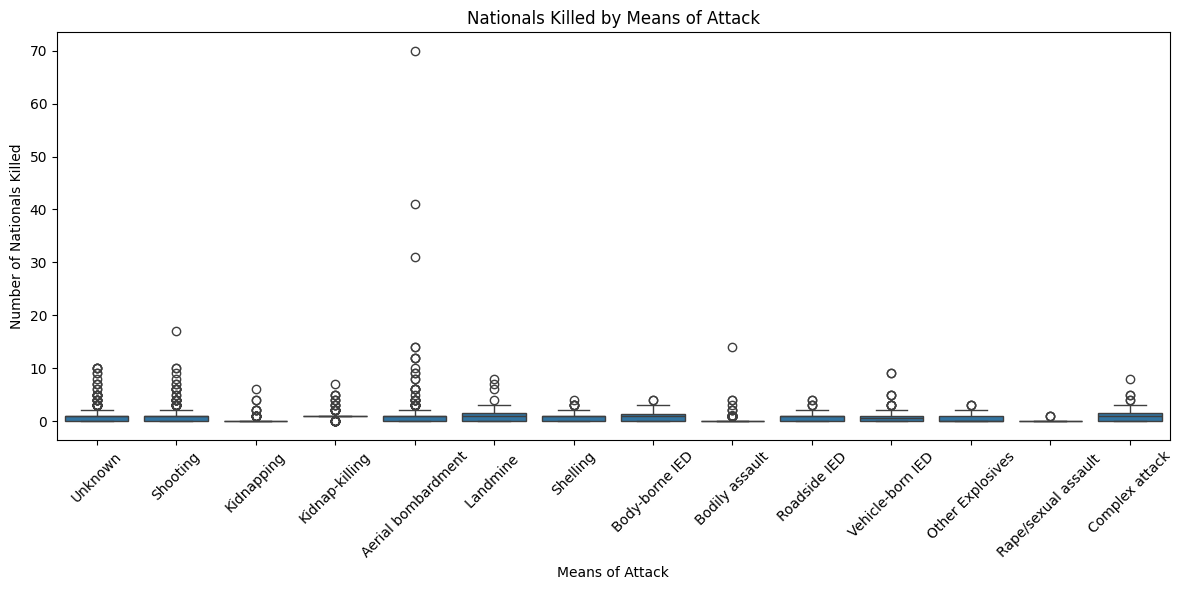

In [5]:
# Boxplot of nationals killed by means of attack
plt.figure(figsize=(12,6))
sns.boxplot(x='Means of attack', y='Nationals killed', data=df)
plt.title('Nationals Killed by Means of Attack')
plt.xlabel('Means of Attack')
plt.ylabel('Number of Nationals Killed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../src/assets/nationals_killed_by_attack.png')
plt.show()


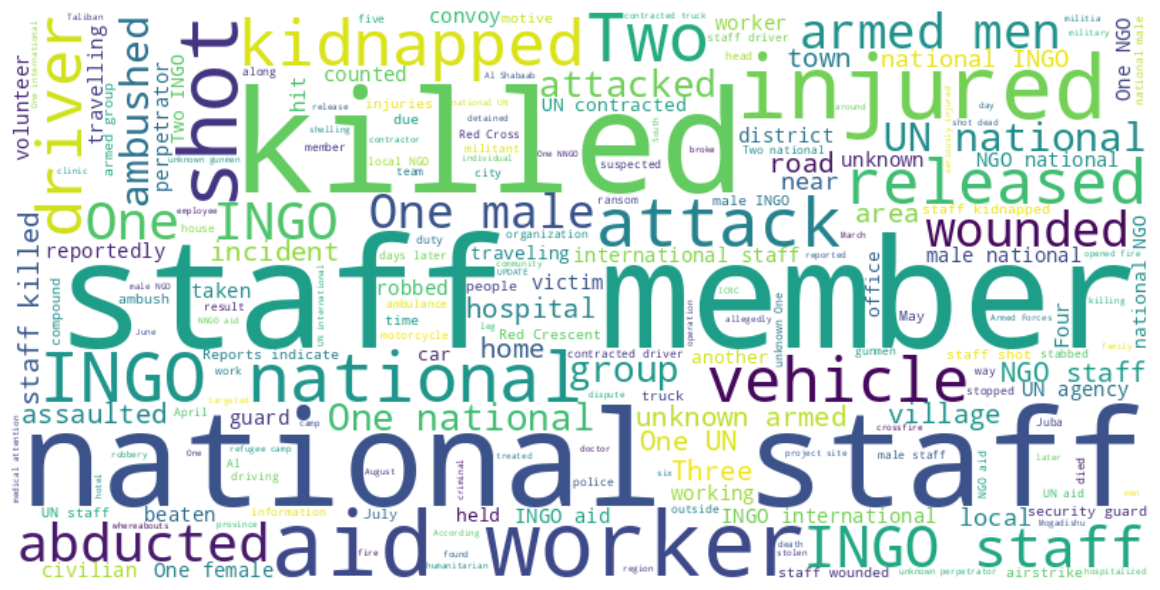

In [7]:
from wordcloud import WordCloud

# Combine all text from the 'Details' column
text_data = ' '.join(df['Details'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('../src/assets/details_wordcloud.png')
plt.show()


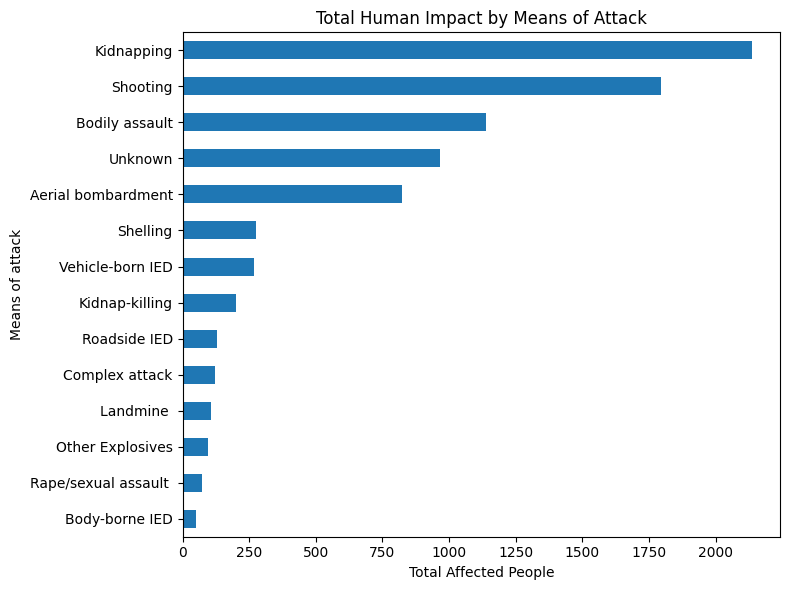

In [8]:
# Drop rows where 'Means of attack' is missing
df = df.dropna(subset=['Means of attack'])

# Convert 'Total affected' to numeric type (in case of non-numeric entries)
df['Total affected'] = pd.to_numeric(df['Total affected'], errors='coerce')

# Group data by 'Means of attack' and calculate total affected per attack type
attack_impact = df.groupby('Means of attack')['Total affected'].sum().sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
attack_impact.plot(kind='barh')
plt.xlabel('Total Affected People')
plt.title('Total Human Impact by Means of Attack')
plt.gca().invert_yaxis()  # Show the highest value on top
plt.tight_layout()
plt.savefig('../src/assets/total_human_impact_by_means.png')
plt.show()

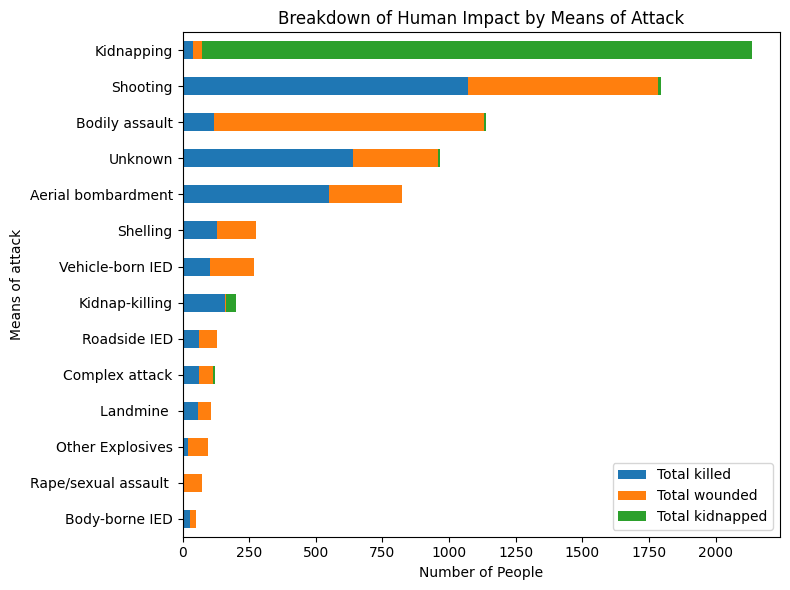

In [10]:
# Drop rows with missing 'Means of attack'
df = df.dropna(subset=['Means of attack'])

# Convert relevant columns to numeric (if not already)
for col in ['Total killed', 'Total wounded', 'Total kidnapped']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group data by 'Means of attack' and sum each category
impact_breakdown = df.groupby('Means of attack')[['Total killed', 'Total wounded', 'Total kidnapped']].sum()

# Sort by total number affected (sum of all 3)
impact_breakdown['Total'] = impact_breakdown.sum(axis=1)
impact_breakdown = impact_breakdown.sort_values('Total', ascending=False).drop(columns='Total')

# Plot stacked bar chart
impact_breakdown.plot(kind='barh', stacked=True, figsize=(8, 6))
plt.xlabel('Number of People')
plt.title('Breakdown of Human Impact by Means of Attack')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../src/assets/breakdown_of_human_impact_by_means_of_attack.png')
plt.show()

In [16]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load data
df = pd.read_csv('../data/security_incidents.csv')

# Drop rows missing location or attack type
df = df.dropna(subset=['Latitude', 'Longitude', 'Means of attack'])

# Optional: Filter to most common attack types (top 5)
top_attacks = df['Means of attack'].value_counts().nlargest(5).index
df_filtered = df[df['Means of attack'].isin(top_attacks)]

# Create a base map centered at the equator
m = folium.Map(location=[0, 20], zoom_start=2, tiles='CartoDB positron')

# Add marker clustering to avoid overlapping
marker_cluster = MarkerCluster().add_to(m)

# Add each point to the map with a popup
for i, row in df_filtered.iterrows():
    popup_text = f"""
    <b>Country:</b> {row['Country']}<br>
    <b>Attack Type:</b> {row['Means of attack']}<br>
    <b>Killed:</b> {row['Total killed']}<br>
    <b>Wounded:</b> {row['Total wounded']}<br>
    <b>Kidnapped:</b> {row['Total kidnapped']}
    """
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        popup=popup_text,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Display the map
m

# Save the map
m.save('../src/assets/security_incidents_map.html')

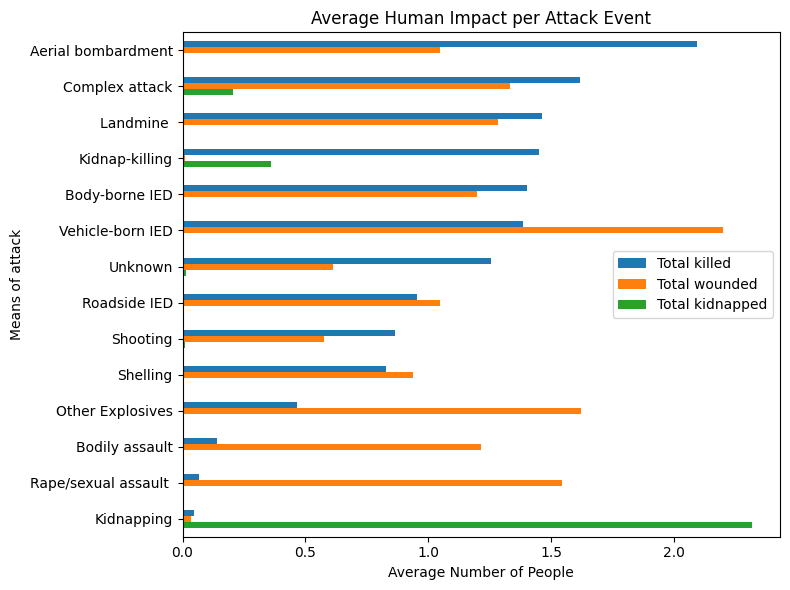

In [13]:
# Drop missing values
df = df.dropna(subset=['Means of attack'])

# Convert relevant columns to numeric
for col in ['Total killed', 'Total wounded', 'Total kidnapped']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Count number of events per attack type
attack_counts = df['Means of attack'].value_counts()

# Group and sum impact by attack type
impact_totals = df.groupby('Means of attack')[['Total killed', 'Total wounded', 'Total kidnapped']].sum()

# Compute average per attack
impact_avg = impact_totals.div(attack_counts, axis=0)

# Sort by average total killed per attack
impact_avg = impact_avg.sort_values('Total killed', ascending=False)

# Plot
impact_avg[['Total killed', 'Total wounded', 'Total kidnapped']].plot(kind='barh', figsize=(8, 6), stacked=False)
plt.title("Average Human Impact per Attack Event")
plt.xlabel("Average Number of People")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../src/assets/average_human_imapct_per_attack.png')
plt.show()

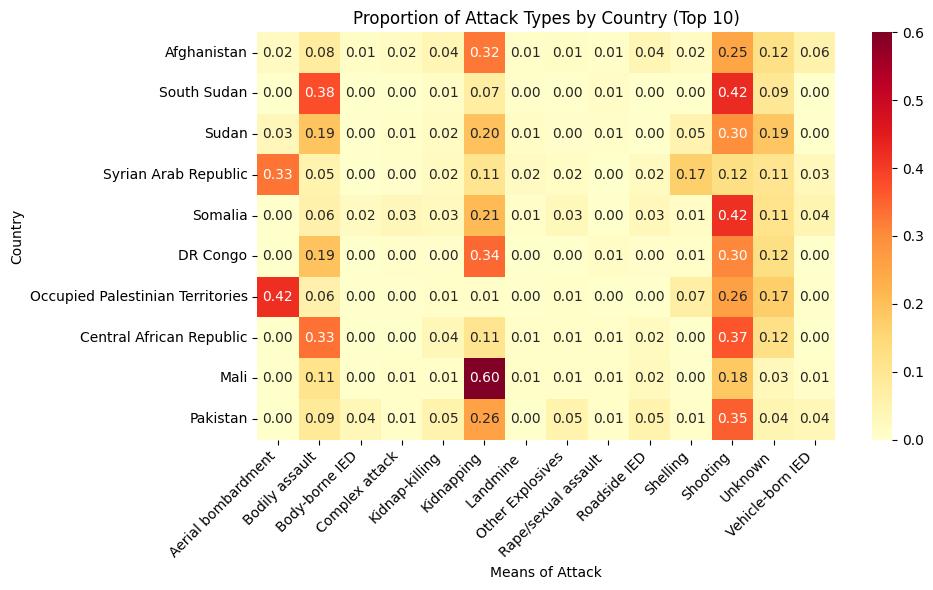

In [14]:
# Drop rows missing country or attack type
df = df.dropna(subset=['Country', 'Means of attack'])

# Create pivot table: rows = Country, columns = Attack Types, values = count of incidents
country_attack = pd.pivot_table(df,
                                 index='Country',
                                 columns='Means of attack',
                                 values='Incident ID',
                                 aggfunc='count',
                                 fill_value=0)

# Get the top 10 countries with the highest total number of attacks
top_countries = country_attack.sum(axis=1).nlargest(10).index

# Subset the table to only include top countries
country_attack_top = country_attack.loc[top_countries]

# Normalize each row to represent proportions within each country
country_attack_norm = country_attack_top.div(country_attack_top.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(country_attack_norm, cmap="YlOrRd", annot=True, fmt=".2f")
plt.title("Proportion of Attack Types by Country (Top 10)")
plt.ylabel("Country")
plt.xlabel("Means of Attack")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../src/assets/proportion_of_attack_types_by_countries.png')
plt.show()